### Implémenter :

- Une classe "fonction d'activation" qui calcule une fonction d'activation et sa dérivée au moins pour la sigmoïde.
- Un réseau de neurones (reprendre le TP2), de préférence sous forme de classe
- La backpropagation (+ descente de gradient) pour le réseau. 

Pour vous aider, voici un premier canevas

In [35]:
import numpy as np

class activation:
    def __init__(self, function, derivative):
        self.function = function
        self.derivative = derivative

sigmoid = activation(lambda x : 1/(1+np.exp(-x)), lambda x : np.exp(-x)/((1+np.exp(-x))**2))
identity = activation(lambda x : x, lambda x : 1)

class layer:
    def __init__(self, size_in, size_out, activation_function):
        self.entry = np.zeros([size_in])
        self.weights = np.random.normal(size=[size_out, size_in])
        self.gradient_weights = np.zeros([size_out, size_in])
        self.bias = np.random.normal(size=[size_out])
        self.gradient_bias = np.zeros([size_out])
        self.activation = activation_function
        
    def output(self):
        return self.activation.function(self.weights @ self.entry + self.bias)
    
    def derivate(self):
        return self.activation.derivative(self.weights @ self.entry + self.bias)
    
    def descend(self, step_length):
        self.weights -= step_length * self.gradient_weights
        self.bias -= step_length * self.gradient_bias
        
        # Reset gradients
        self.gradient_weights = np.zeros([self.weights.shape[0], self.weights.shape[1]])
        self.gradient_bias = np.zeros([self.bias.shape[0]])

class network:
    def __init__(self):
        self.layers = []
        
    def add_layer(self,size_in, size_out, activation_function):
        new_layer = layer(size_in, size_out, activation_function)
        self.layers.append(new_layer)
        
    def run(self,x):
        output = np.copy(x) #Par défaut, numpy ne fait pas de copies lors des attributions
        for layer in self.layers:
            layer.entry = np.copy(output)
            output = np.copy(layer.output())
        return output
    
    def fit(self,training_data, training_labels, nb_steps, step_length):
        n = training_data.shape[0]
        for i in range(nb_steps):
            loss = 0
            for j in range(n):
                output = self.run(training_data[j,:].transpose())
                H = -2 * (training_labels[j,:] - output)
                loss += np.sum(np.pow(training_labels[j,:] - output, 2))
                
                for layer in reversed(self.layers):
                    temp = layer.derivate()
                    layer.gradient_weights += H * temp @ layer.entry.transpose()
                    layer.gradient_bias += H * temp
                    H = layer.weights.transpose() @ (H * temp)
                    
            
            for layer in self.layers:
                layer.descend(step_length)
            
            if(i%100 == 0) : print(loss)

### Test : régression linéaire

Régresser Y par rapport à X dans un cas linéaire avec un réseau à une seule couche. (On devrait obtenir une droite de régression linéaire)

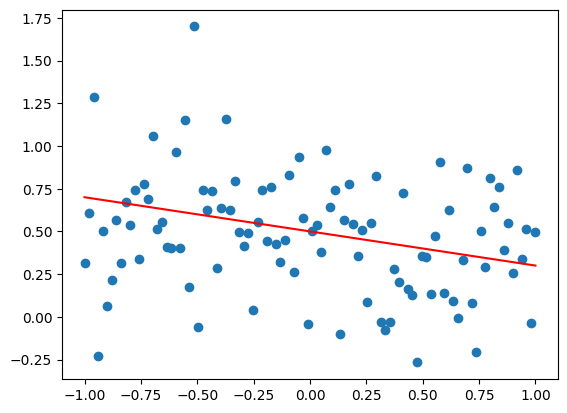

In [36]:
import numpy as np
import matplotlib.pyplot as plt

n = 100

X = np.linspace(-1,1,n)
X.resize([n,1])
fX = -0.2*X + 0.5

eps = np.random.multivariate_normal(mean = [0], cov = [[0.1]], size = [n])

Y = fX + eps 

plt.scatter(X,Y)
plt.plot(X, fX, 'red')

In [37]:
NN = network()
NN.add_layer(1,10,sigmoid)
NN.fit(X,Y,1000, 1e-5) # fX étant un réseau particulier, on devrait pouvoir fitter (quasi) parfaitement
hatY = np.copy(Y)
n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')
plt.show()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 10)

In [38]:
#Testons un réseau à deux couches

NN = network()
NN.add_layer(1,10,identity)
NN.add_layer(10,1,identity)
NN.fit(X,Y,1000,1e-4) 
n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10 is different from 1)

In [ ]:
#Testons la fonction d'activation sigmoïde

NN = network()
NN.add_layer(1,10,sigmoid)
NN.add_layer(10,1,identity)
NN.fit(X,Y,1000,1e-2) 
n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')

### Test : régression polynomiale

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 100

X = np.linspace(-1,1,n)
X.resize([n,1])
fX = 0.3*X**5 - X**2 + 0.5

eps = np.random.multivariate_normal(mean = [0], cov = [[0.1]], size = [n])

Y = fX + eps 

plt.scatter(X,Y)
plt.plot(X, fX, 'red')

In [ ]:
NN = network()
NN.add_layer(1,100,sigmoid)
NN.add_layer(100,100,sigmoid)
NN.add_layer(100,1,identity)

NN.fit(X,Y, 1000, 1e-2)

n = X.shape[0]
for j in range(n):
    hatY[j] = NN.run(X[j,:].transpose())
    
plt.scatter(X,Y)
plt.scatter(X,hatY)
plt.plot(X, fX, 'red')